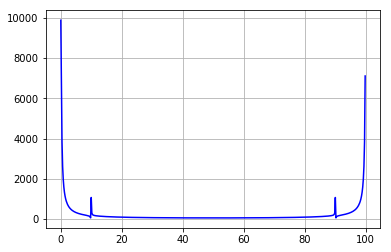

FREQENCIES IN PEAKS ARE 

0.5
4.51

Coefs of approximation are:
3.00000008
4.99999710
-6.99999784
1.99999969
5.00000122
0.00000140


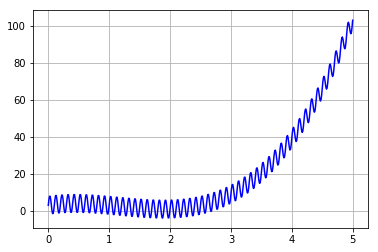

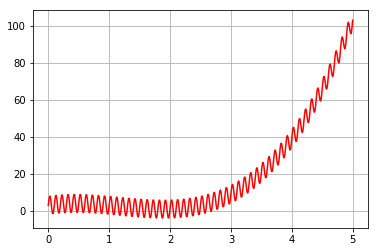

In [29]:
import numpy as np

#input
with open('Lab1\\f1.txt', 'r') as file:
    data = file.read().replace('\n', ' ')

dataL = data.split(' ')
dataL.remove('')
N = len(dataL)
cx = np.zeros(N)
it = 0
for st in dataL:
    cx[it] = float(st)
    it+=1

#setting signal params
T = 5
df = 1/T
dt = 1/100
t = np.zeros(N)
for i in range(N):
     t[i]=dt*i
extr = np.zeros(N-2)

#USING FFT
c = np.fft.fft(cx)
freq = np.fft.fftfreq(501, 0.01)
for i in range(N):
    c = np.abs(c)
for i in range(N):
    if(freq[i]<0): 
        freq[i]=100 - (-1*freq[i])

import matplotlib.pyplot as plt
plt3.plot(freq , c, 'b')
plt3.grid()
plt3.show()

#searching local maximums
jj = 0
extr_loc = np.zeros(N-2)
for i in range(N-2):
    if(c[i]<=c[i+1] and c[i+2]<=c[i+1]):
        extr[jj] = c[i+1]
        extr_loc[jj] = i+1
        jj=jj+1
   
#getting frequencies
for i in range(jj):
    extr[i] = extr[i]*df
print("FREQENCIES IN PEAKS ARE \n")
for i in range(jj):
    print(extr_loc[i]/100)
    
#now we have j frequencies in extr[] array
#next step is to get coeffs of fft and build a plot
#--------------------------------------------------------------------------------------------------------------------------------
#LAB 2  - let's find a_j , j = 1,2,.., k+1
pf = np.zeros(jj)
for i in range(jj):
    pf[i]=extr_loc[i]/5
K = jj + 4
matrix = np.zeros((N,K))
vect = np.zeros(N)
for i in range(N):
    for j in range(K):
        if(j<4):
            matrix[i][j] = t[i]**j
        else:
            matrix[i][j] = np.sin(2*np.pi*pf[j - 4]*t[i])

mpv = np.matmul(np.linalg.pinv(matrix) , cx)
print("\nCoefs of approximation are:")
for coef in mpv:
    print(str.format('{0:.8f}', coef))
res = np.zeros(N)
for i in range(N):
    for j in range(K):
        if(j < 4):
            res[i]+= mpv[j]*(t[i]**j)
        else:
            res[i]+= mpv[j]*np.sin(2*np.pi*pf[j - 4]*t[i])
            
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

#plotting
#BLUE - real
#RED - approximation
plt1.plot(t, cx , 'b')
plt1.grid()
plt1.show()
plt2.plot(t, res , 'r')
plt2.grid()
plt2.show()